In [1]:
def DenominatorSize(d, q):
    '''
    INPUT: d negative integer -> K:=Q(sqrt(d)), q in K
    OUTPUT: denominator size 1/N(cfrak), where cfrak = (q) + afrak^(-1)
    '''
    if d not in ZZ or d>=0:
        raise ValueError("first input should be a negative integer")
    K = QuadraticField(d)
    OK = K.ideal(1)
    if q not in K:
        raise ValueError("second input should be an element of Q(first input)")
    alpha = q.numerator()
    beta = q.denominator()
    cfrak = alpha*OK + beta*OK #here we are implicitly writing q=a/b with a=q and b=1. This is as good as any other choice of a and b
    D = beta^2/(cfrak.norm())
    return D

In [2]:
def find_equivalent_ideal_of_minimal_norm(d, c):
    '''
    INPUT: d negative integer -> K:=Q(sqrt(d)), c ideal in K
    OUTPUT: ideal in the same class of c with minimal norm
    '''
    if d not in ZZ or d>=0:
        raise ValueError("first input should be a negative integer")
    K = QuadraticField(d)
    for a in K.ideals_of_bdd_norm(c.norm() - 1).items():
        for ideala in a[1]:
            if (ideala * c ** -1).is_principal():
                if c.norm() <= ideala.norm():
                    return c
                return ideala
    return c

In [3]:
def cusp_representatives(d):
    '''
    INPUT: d negative integer -> K:=Q(sqrt(d))
    OUTPUT: a list of h ideals, where h is the class number of K, chosen of smallest norm in each class 
    '''
    if d not in ZZ or d>=0:
        raise ValueError("first input should be a negative integer")
    K = QuadraticField(d)
    cusp_reps = []
    for ideal_class in K.class_group():
        c = ideal_class.ideal()
        c = find_equivalent_ideal_of_minimal_norm(d, c)
        cusp_reps.append(c)
    # We finally sort all representatives according to norm.
    cusp_reps.sort(key=lambda x: x.norm())
    return cusp_reps

In [4]:
def algebraic_integers_bounded_norm(d, B):
    '''
    INPUT: d negative integer -> K:=Q(sqrt(d)), B non-negative integer
    OUTPUT: list of algebraic integers in K of norm at most B
    '''
    if d not in ZZ or d>=0:
        raise ValueError("first input should be a negative integer")
    K = QuadraticField(d)
    if B not in ZZ or B<0:
        raise ValueError("second input should be a non-negative integer")
    listofintegers = [0]
    a = K.gen()
    if d%4==1:
        w = a/2+1/2
    else:
        w = a
    units = [1, -1]
    if d==-1:
        units.extend([w,-w])
    if d==-3:
        units.extend([w,w-1,-w,-w+1])
    listgens = []
    dictideals = K.ideals_of_bdd_norm(B)
    for norm in dictideals.keys():
        for J in dictideals[norm]:
            if J.is_principal():
                gen = J.gens_reduced()[0]
                if K(gen).norm()==norm:
                    listgens.append(gen)
                else:
                    print('qualcosa `e andato storto :()')
    for g in listgens:
        listofintegers.extend([g*u for u in units])
    return listofintegers

In [11]:
def CuspSearch(d, N):
    '''
    INPUT: d negative integer -> K:=Q(sqrt(d)), N positive integer
    OUTPUT: dictionary of cusps of K in the form (alpha, beta) keyed by denominator size
    '''
    if d not in ZZ or d>=0:
        raise ValueError("first input should be a negative integer")
    K = QuadraticField(d)
    if N not in ZZ or N<=0:
        raise ValueError("second input should be positive integer")
    OK = K.ideal(1)
    a = K.gen()
    if d%4==1:
        w = a/2+1/2
    else:
        w = a
    R = (w+1).norm() #this is the radius that allows us to cover the fundametal parallelogram
    Delta = K.discriminant()
    B = floor(sqrt(abs(Delta)/3))
    CuspGens = {} #dictionary to which we add i: [(alpha1,beta1), ..., (alphan,betan)], with alphaj/betaj of denominator size i
    list_of_denoms = []
    for beta in algebraic_integers_bounded_norm(d,B*N): #finds beta in K such that |beta|^2<=BN
        if beta in OK and beta!=0: #restricts to beta in OK
            for alpha in algebraic_integers_bounded_norm(d,R*K(beta).norm()): #finds alpha in K such that |a|^2<=|beta|^2R
                if alpha in OK: #restricts to alpha in OK
                    p = alpha/beta
                    D = DenominatorSize(d, p)
                    if D <= N: #check if the denominator size respects the bound
                        if D not in list_of_denoms:
                            list_of_denoms.append(D)
                            CuspGens[D] = []
                        if d%4==1:
                            coord = p.list() #gives p in terms of 1 and a=sqrt(-d)
                            c = [coord[0]-coord[1],2*coord[1]]  #gives p in terms of 1 and w=a/2+1/2
                            if c[0]>=0 and c[0]<=1 and c[1]>=0 and c[1]<=1:#restricting to the fundamental parallelogram
                                CuspGens[D].append((alpha,beta))
                        else:
                            c = p.list() #gives p in terms of 1 and a=sqrt(-2)
                            if c[0]>=0 and c[0]<=1 and c[1]>=0 and c[1]<=1:#restricting to the fundamental parallelogram
                                CuspGens[D].append((alpha,beta))
    return CuspGens

In [6]:
def PlotSnew(d, N):
    '''
    INPUT: d negative integer -> K:=Q(sqrt(d)), N positive integer for the level of the maximum denominator size
    OUTPUT: plot of all points in K of denominator size at most N
    '''
    if d not in ZZ or d>=0:
        raise ValueError("first input should be a negative integer")
    if N not in ZZ or N<=0:
        raise ValueError("second input should be a positive integer")
    coordinates = []
    cusps = CuspSearch(d, N)
    denominators = cusps.keys()
    for i in range(N):
        if i+1 in denominators:
            for cusp in cusps[i+1]:
                p = cusp[0]/cusp[1]
                coordinates.append((p.real(),p.imag()))
    return point(coordinates)

In [7]:
def SetSnew(d, N):
    '''
    INPUT: d negative integer -> K:=Q(sqrt(d)), N positive integer for the level of the maximum denominator size
    OUTPUT: plot of all points in K of denominator size at most N
    '''
    if d not in ZZ or d>=0:
        raise ValueError("first input should be a negative integer")
    if N not in ZZ or N<=0:
        raise ValueError("second input should be a positive integer")
    coordinates = []
    cusps = CuspSearch(d, N)
    denominators = cusps.keys()
    for i in range(N):
        if i+1 in denominators:
            for cusp in cusps[i+1]:
                p = cusp[0]/cusp[1]
                coordinates.append((p.real(),p.imag()))
    return set(coordinates)

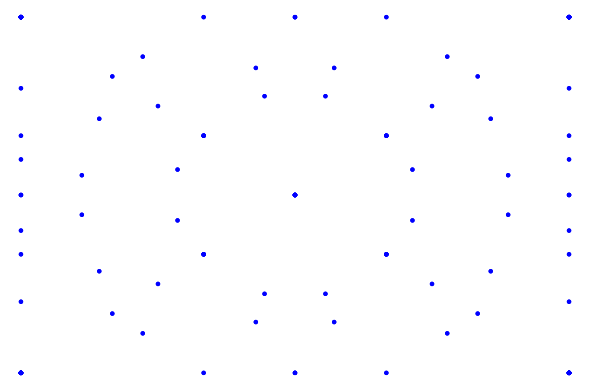

In [12]:
show(PlotSnew(-5,9),axes=False)

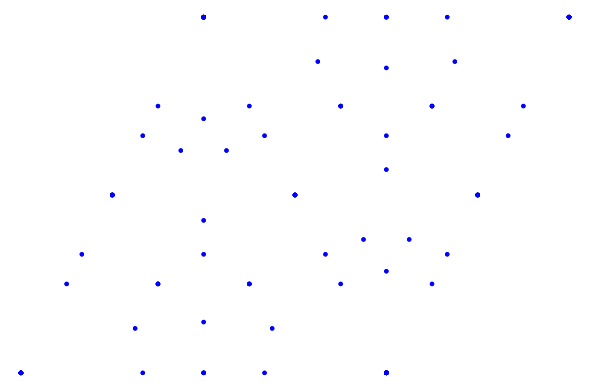

In [13]:
show(PlotSnew(-7,9),axes=False)

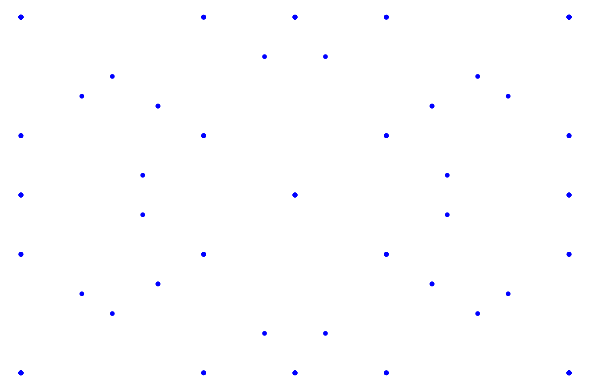

In [14]:
show(PlotSnew(-137,10),axes=False)